# Forum pageviews (Time Series Analysis)

In [1]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part I : Data Prepareation

In [2]:
# load dataset using pd.read_csv()

series = pd.read_csv('forum-pageviews.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)
print(type(series))
print(series.head())

<class 'pandas.core.series.Series'>
date
2016-05-09     1201
2016-05-10     2329
2016-05-11     1716
2016-05-12    10539
2016-05-13     6933
Name: value, dtype: int64


### Load Time Series Data

In [3]:
# Descriptive statistics

series.describe()

count    1.304000e+03
mean     6.722068e+04
std      5.933964e+04
min      1.201000e+03
25%      3.575775e+04
50%      5.719750e+04
75%      8.388300e+04
max      1.173655e+06
Name: value, dtype: float64

### Explore Time Series Data

In [4]:
# peak at the data

print(series.head(10))

date
2016-05-09     1201
2016-05-10     2329
2016-05-11     1716
2016-05-12    10539
2016-05-13     6933
2016-05-14     3127
2016-05-15     2927
2016-05-16     2591
2016-05-17     3403
2016-05-18     5410
Name: value, dtype: int64


In [5]:
# number of observaitons

print(series.size)

1304


In [6]:
# querying by time

print(series['2016-05'])

date
2016-05-09     1201
2016-05-10     2329
2016-05-11     1716
2016-05-12    10539
2016-05-13     6933
2016-05-14     3127
2016-05-15     2927
2016-05-16     2591
2016-05-17     3403
2016-05-18     5410
2016-05-19    19736
2016-05-20    17491
2016-05-21    13370
2016-05-22    13158
2016-05-23    13887
2016-05-24    15336
2016-05-25    14779
2016-05-26    18060
2016-05-27    19997
2016-05-28    19044
2016-05-29    20325
2016-05-30    16607
2016-05-31    16616
Name: value, dtype: int64


In [7]:
# descriptive statistics

print(series.describe())

count    1.304000e+03
mean     6.722068e+04
std      5.933964e+04
min      1.201000e+03
25%      3.575775e+04
50%      5.719750e+04
75%      8.388300e+04
max      1.173655e+06
Name: value, dtype: float64


## Part II: Basic Feature Engineering

### Date Time Features

In [8]:
# create date time features of a dataset

dataframe = pd.DataFrame()

dataframe['month'] = [series.index[i].month for i in range(len(series))]
dataframe['day'] = [series.index[i].day for i in range(len(series))]
dataframe['value'] = [series[i] for i in range(len(series))]
print(dataframe.head(5))

   month  day  value
0      5    9   1201
1      5   10   2329
2      5   11   1716
3      5   12  10539
4      5   13   6933


### Lag Features

In [9]:
# create a lag features

pageviews = pd.DataFrame(series.values)
dataframe = pd.concat([pageviews.shift(1), pageviews], axis = 1)
dataframe.columns = ['p', 'p+1']
print(dataframe.head(5))

         p    p+1
0      NaN   1201
1   1201.0   2329
2   2329.0   1716
3   1716.0  10539
4  10539.0   6933


In [10]:
# create lag feature with (include more lag features)

pageviews = pd.DataFrame(series.values)
dataframe = pd.concat([pageviews.shift(3), pageviews.shift(2), pageviews.shift(1), pageviews], axis = 1)
dataframe.columns = ['p-2', 't-1', 't', 't+1']
print(dataframe.head(5))

      p-2     t-1        t    t+1
0     NaN     NaN      NaN   1201
1     NaN     NaN   1201.0   2329
2     NaN  1201.0   2329.0   1716
3  1201.0  2329.0   1716.0  10539
4  2329.0  1716.0  10539.0   6933


### Rolling Window Statistics

In [11]:
# create a rolling mean

pageview = pd.DataFrame(series.values)
shifted = pageviews.shift(1)
window = shifted.rolling(window = 2 )
means = window.mean()
dataframe = pd.concat([means, pageviews], axis = 1)
dataframe.columns = ['mean(p-1, p)', 'p+1']
print(dataframe.head(5))

   mean(p-1, p)    p+1
0           NaN   1201
1           NaN   2329
2        1765.0   1716
3        2022.5  10539
4        6127.5   6933


In [12]:
# create rolling statistics features (with statistics)

pageviews = pd.DataFrame(series.values)
width = 3
shifted = pageview.shift(width - 1)
window = shifted.rolling(window = width)
dataframe = pd.concat([window.min(), window.mean(), window.max(), pageviews], axis = 1)
dataframe.columns = ['min', 'mean', 'max', 'p+1']
print(dataframe.head(5))

      min         mean     max    p+1
0     NaN          NaN     NaN   1201
1     NaN          NaN     NaN   2329
2     NaN          NaN     NaN   1716
3     NaN          NaN     NaN  10539
4  1201.0  1748.666667  2329.0   6933


### Expanding Window Statistics

In [13]:
# create expanding window features

pageviews = pd.DataFrame(series.values)
window = pageviews.expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), pageviews.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 'p+1']
print(dataframe.head(5))

      min         mean      max      p+1
0  1201.0  1201.000000   1201.0   2329.0
1  1201.0  1765.000000   2329.0   1716.0
2  1201.0  1748.666667   2329.0  10539.0
3  1201.0  3946.250000  10539.0   6933.0
4  1201.0  4543.600000  10539.0   3127.0


## Part III: Data Visualizations

### Line Plot

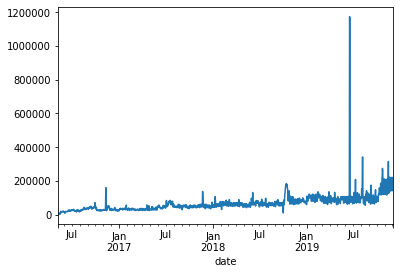

In [14]:
# create a line plot

series.plot()
plt.show()

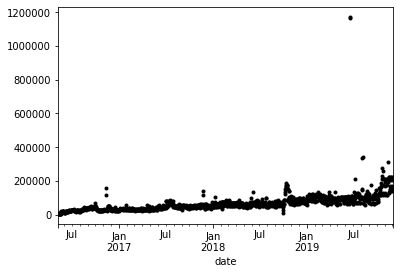

In [15]:
# create a dot plot

series.plot(style = 'k.')
plt.show()

In [16]:
# create a stacked line plots

groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

ValueError: Length of values does not match length of index

### Histogram and Density Plots

In [ ]:
# create a histogram plot

series.hist()
plt.show()

In [ ]:
# create a density plot

series.plot(kind='kde')
plt.show()

### Box Whisker Plots by interval

In [17]:
groups = series.groupby(pd.Grouper(freq = 'A'))
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values
    
years.boxplot()
plt.show()

ValueError: Length of values does not match length of index

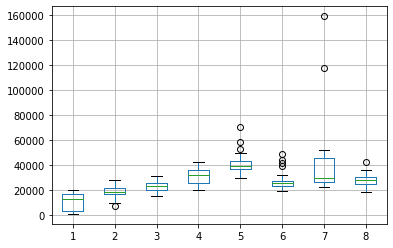

In [24]:
#  create a boxplot of monthly data

one_year = series['2016']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis = 1)
months = pd.DataFrame(months)
months.columns = range(1,9)
months.boxplot()
plt.show()

### Heat Maps

In [27]:
# create a heat map of the yearly data

groups = series.groupby(pd.Grouper(freq = 'A'))
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values
    
years = years.T
plt.matshow(years, interpolation = None, aspect = 'auto')
plt.show()

ValueError: Length of values does not match length of index

In [ ]:
# create a heat ma